<a href="https://colab.research.google.com/github/mcgmed/Tensorflow/blob/main/Detecting-Features-in-Images/Rock_Paper_Scissors_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-11-12 18:48:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  24.0MB/s    in 9.1s    

2022-11-12 18:48:17 (21.1 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-11-12 18:48:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rp

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-117.png', 'rock07-k03-022.png', 'rock06ck02-067.png', 'rock05ck01-044.png', 'rock03-067.png', 'rock06ck02-086.png', 'rock04-112.png', 'rock02-038.png', 'rock07-k03-050.png', 'rock07-k03-101.png']
['paper02-025.png', 'paper05-074.png', 'paper01-042.png', 'paper03-097.png', 'paper03-106.png', 'paper06-102.png', 'paper04-017.png', 'paper04-075.png', 'paper01-101.png', 'paper06-060.png']
['testscissors03-005.png', 'testscissors02-007.png', 'testscissors02-065.png', 'scissors02-115.png', 'scissors03-080.png', 'scissors02-017.png', 'testscissors01-061.png', 'testscissors02-067.png', 'scissors02-092.png', 'scissors03-011.png']


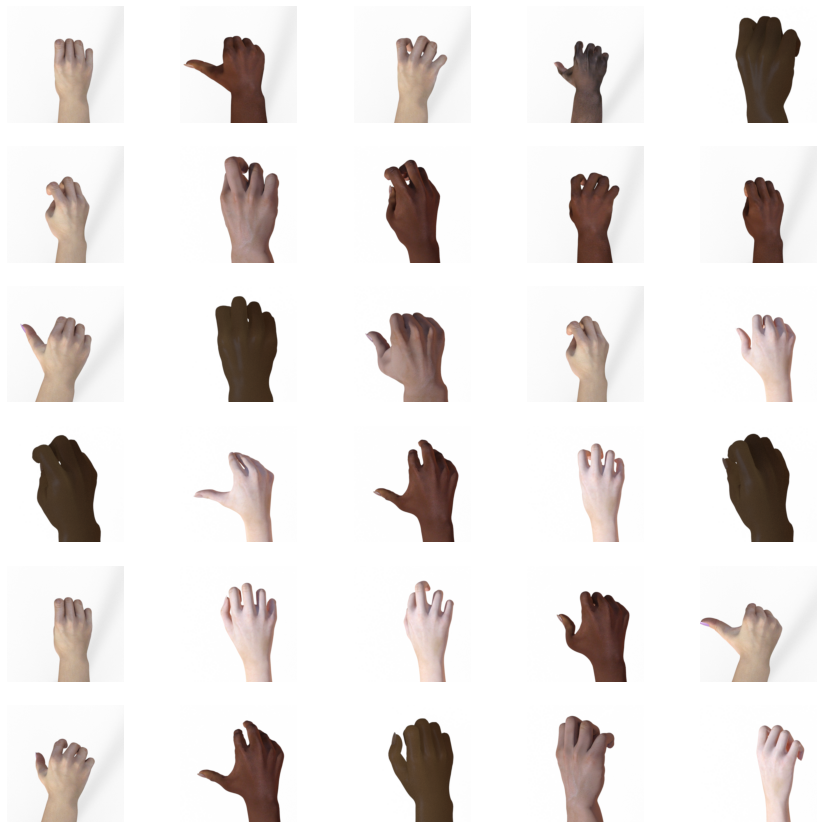

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.tight_layout()

for i in range(30):
  plt.subplot(6, 5, i+1)
  img_path = '/tmp/rps/rock/' + rock_files[i]
  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis('off')

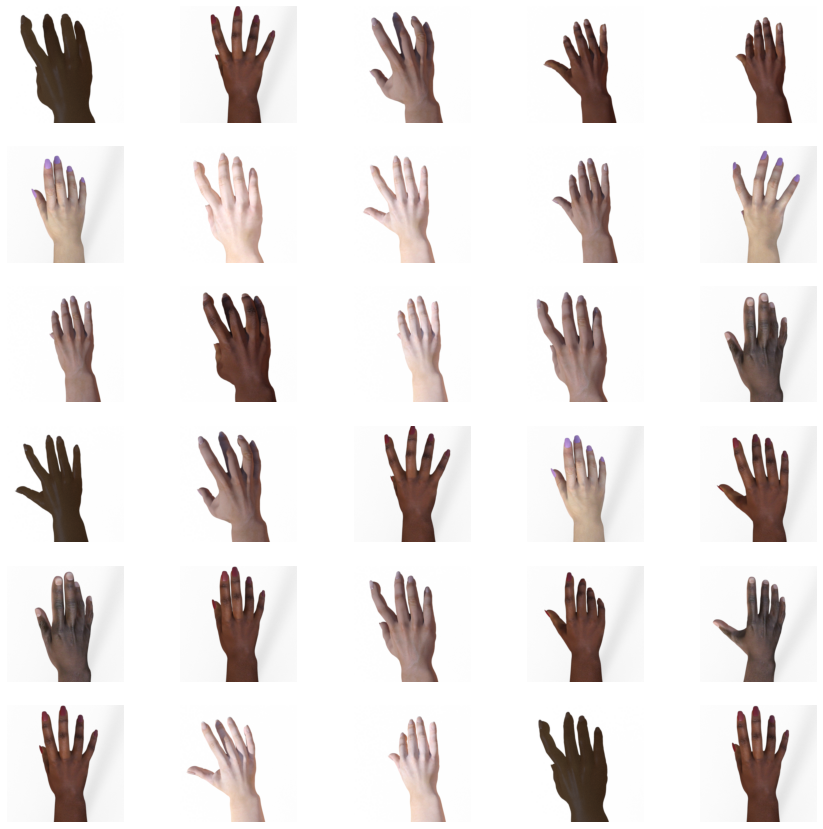

In [5]:
plt.figure(figsize=(15,15))
plt.tight_layout()

for i in range(30):
  plt.subplot(6, 5, i+1)
  img_path = '/tmp/rps/paper/' + paper_files[i]
  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis('off')

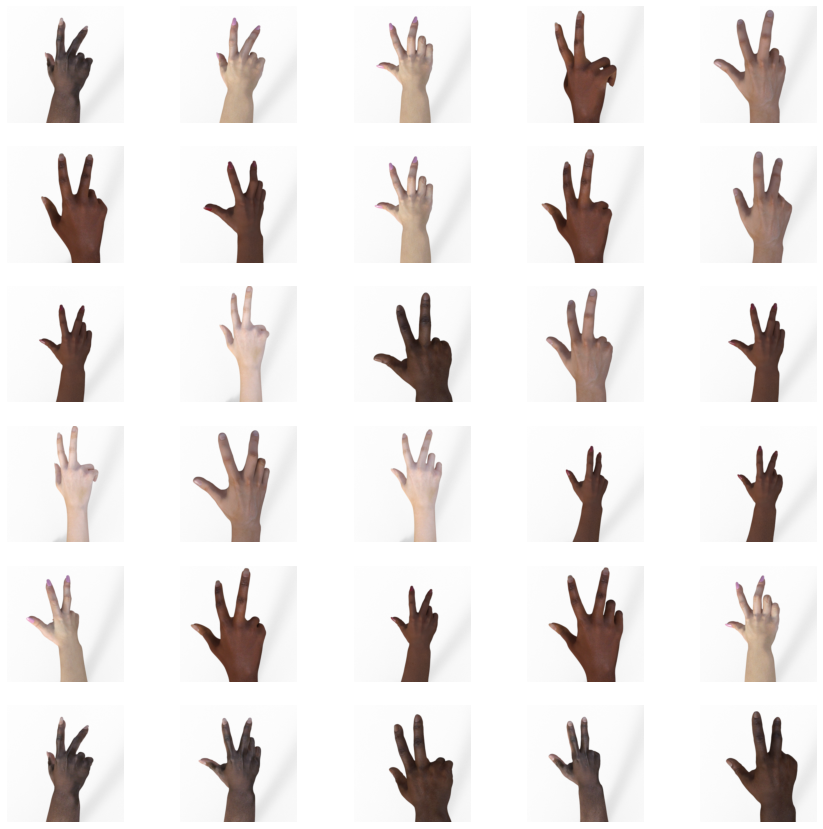

In [6]:
plt.figure(figsize=(15,15))
plt.tight_layout()

for i in range(30):
  plt.subplot(6, 5, i+1)
  img_path = '/tmp/rps/scissors/' + scissors_files[i]
  img = plt.imread(img_path)
  plt.imshow(img)
  plt.axis('off')

In [7]:
from warnings import resetwarnings
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from google.colab import files
from tensorflow.keras.preprocessing import image

TRAINING_DIR = '/tmp/rps/'
VALIDATION_DIR = '/tmp/rps-test-set/'

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, target_size=(150,150), class_mode='sparse')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(150,150), class_mode='sparse')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(3, activation='softmax')])

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [10]:
history = model.fit(train_generator, epochs=20, validation_data = validation_generator)

Epoch 1/20
79/79 [==============================] - 31s 281ms/step - loss: 2.0843 - accuracy: 0.3468 - val_loss: 1.0974 - val_accuracy: 0.5000
Epoch 2/20
79/79 [==============================] - 23s 286ms/step - loss: 1.0345 - accuracy: 0.4480 - val_loss: 0.6788 - val_accuracy: 0.6371
Epoch 3/20
79/79 [==============================] - 21s 266ms/step - loss: 0.7430 - accuracy: 0.6750 - val_loss: 0.4442 - val_accuracy: 0.7366
Epoch 4/20
79/79 [==============================] - 22s 280ms/step - loss: 0.5453 - accuracy: 0.7714 - val_loss: 0.2554 - val_accuracy: 0.9435
Epoch 5/20
79/79 [==============================] - 21s 267ms/step - loss: 0.4549 - accuracy: 0.8425 - val_loss: 0.2584 - val_accuracy: 0.9005
Epoch 6/20
79/79 [==============================] - 22s 274ms/step - loss: 0.3415 - accuracy: 0.8754 - val_loss: 0.5218 - val_accuracy: 0.7285
Epoch 7/20
79/79 [==============================] - 21s 265ms/step - loss: 0.2786 - accuracy: 0.9115 - val_loss: 0.0795 - val_accuracy: 0.9704

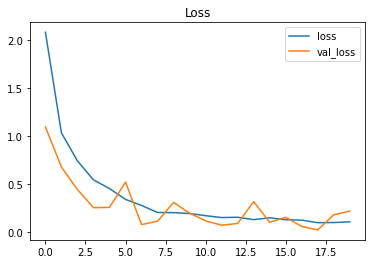

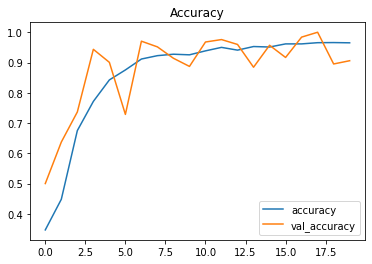

In [11]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss");
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy");

In [16]:
validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [15]:
test = validation_generator[1][0][25]
test = np.expand_dims(test, axis = 0)
pred_ = model.predict(test)
pred_

1/1 [==============================] - 0s 19ms/step


array([[4.2765771e-04, 9.9956995e-01, 2.4254489e-06]], dtype=float32)

In [17]:
np.argmax(pred_)

1